# Base models

Testing different base models

- Decision Tree
- Logistic Regression
- Random Forest
- Support Vector Machines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator

## Macros

In [2]:
META_LABEL_METRIC = "precision"
META_MODEL = "LGBMRegressor"
DATASET = "electricity"
BASE_MODELS = ["RandomForestClassifier", "DecisionTreeClassifier", "SVC", "LogisticRegression"]

## Read data

In [3]:
results_df = pd.DataFrame()

for base_model in BASE_MODELS:
    filename = f"metabases/metamodel: {META_MODEL} - basemodel: {base_model} - metric: {META_LABEL_METRIC} - dataset: {DATASET}.csv"
    df = pd.read_csv(filename)
    results_df[base_model] = df["predicted"]
    results_df[f"{base_model}_target"] = df[META_LABEL_METRIC]
    results_df[f"{base_model}_baseline"] = df[f"last_{META_LABEL_METRIC}"]

results_df = results_df.dropna()
results_df.head()

,RandomForestClassifier,RandomForestClassifier_target,RandomForestClassifier_baseline,DecisionTreeClassifier,DecisionTreeClassifier_target,DecisionTreeClassifier_baseline,SVC,SVC_target,SVC_baseline,LogisticRegression,LogisticRegression_target,LogisticRegression_baseline
97,0.680754,0.347222,0.577465,0.477790,0.310811,0.449438,0.370148,0.280000,0.41,0.474702,0.285714,0.44086
98,0.775692,0.412698,0.577465,0.768400,0.326923,0.449438,0.570052,0.337209,0.41,0.685076,0.345238,0.44086
99,0.788842,0.586957,0.577465,0.816610,0.526316,0.449438,0.567565,0.445946,0.41,0.837599,0.458333,0.44086
100,0.908769,0.896552,0.577465,0.863372,0.850000,0.449438,0.539883,0.405405,0.41,0.816899,0.666667,0.44086
101,0.958052,0.888889,0.577465,0.928514,0.961538,0.449438,0.535367,0.371795,0.41,0.750290,0.805556,0.44086


# Results

### Cumulative gain

Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)


Text(0.5, 0.98, 'Cumulative gain')

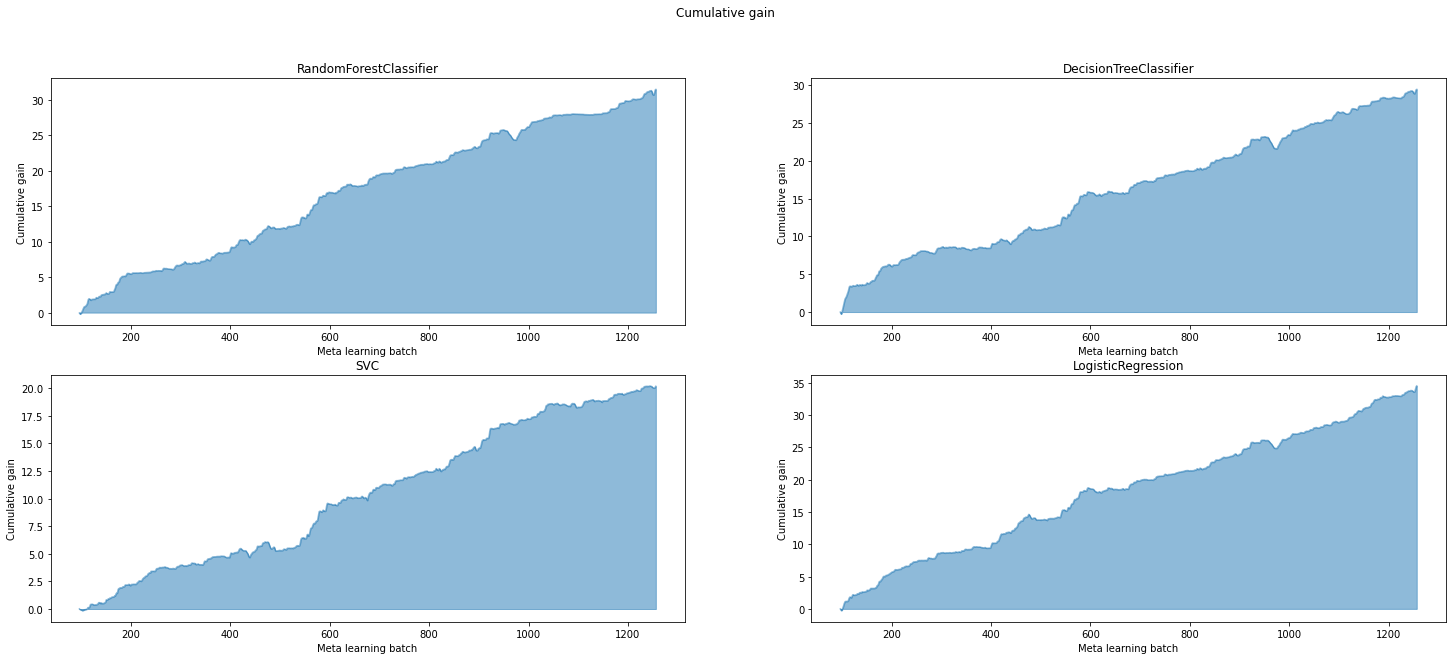

In [5]:
plt.figure(figsize=(25, 10))
for idx, model in enumerate(BASE_MODELS):
    plt.subplot(2, 2, idx + 1)
    evaluator.cumulative_gain(results_df[f"{model}_target"], results_df[model], results_df[f"{model}_baseline"], title=model, subplot=True)
plt.suptitle("Cumulative gain")

## Error

In [8]:
results = []
for model in BASE_MODELS:
    mtl_result = evaluator.get_regression_metrics(results_df[f"{model}_target"], results_df[model])
    results.append({**mtl_result, "type": model})

baseline_result = evaluator.get_regression_metrics(results_df[f"{model}_target"], results_df[f"{model}_baseline"])
results.append({**baseline_result, "type": "baseline"})

results = pd.DataFrame(results)
results.head()

,r2,mse,std,type
0,0.373737,0.021537,0.146715,RandomForestClassifier
1,0.218019,0.023753,0.154121,DecisionTreeClassifier
2,0.064860,0.020067,0.141606,SVC
3,0.183531,0.022822,0.151063,LogisticRegression
4,-0.880466,0.052562,0.229258,baseline


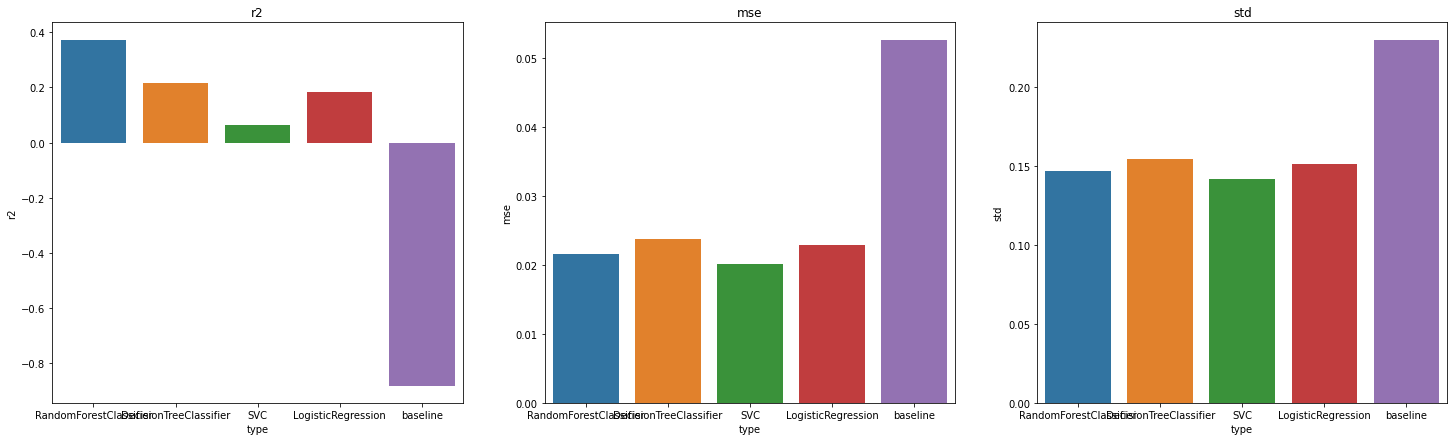

In [9]:
plt.figure(figsize=(25, 7))
for idx, col in enumerate(evaluator.reg_metrics):
    plt.subplot(1, 3, idx + 1)
    sns.barplot(x="type", y=col, data=results)
    plt.title(col)

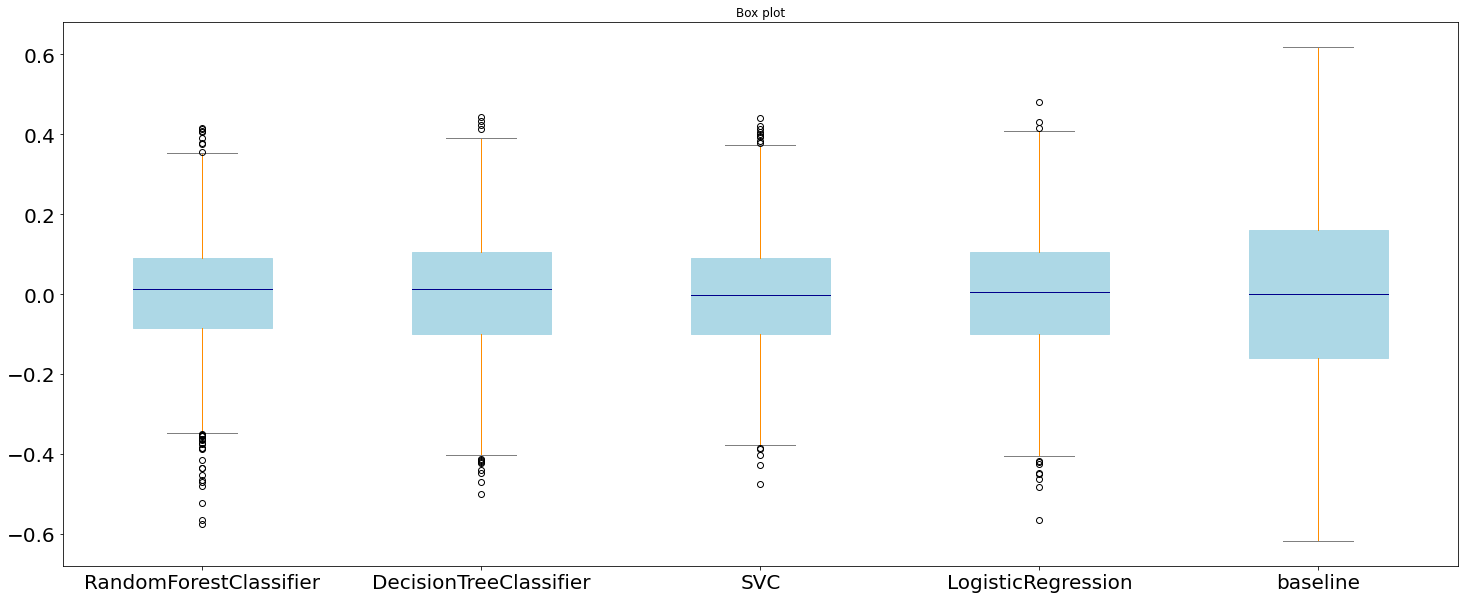

In [17]:
error_df = pd.DataFrame()

for model in BASE_MODELS:
    error_df[model] = results_df[f"{model}_target"] - results_df[model]
error_df["baseline"] = results_df[f"{model}_target"] - results_df[f"{model}_baseline"]
evaluator.box_plot(error_df, figsize=(25, 10))